# Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng lấy tại
https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

## Bài làm

### 1. Import thư viện và nạp dữ liệu

In [3]:
# 1. Import thư viện và nạp dữ liệu (Giống bài mẫu)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns # Thêm thư viện để vẽ ma trận nhầm lẫn
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../data/2.3.3 Bài tập thực hành 1/Customer_Behaviour.csv', encoding='latin-1')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 2. Xử lý dữ liệu

In [4]:
if 'data' in locals():
    # Bỏ cột không cần thiết (Giống bài mẫu bỏ 'Unnamed')
    data = data.drop(columns=['User ID'], axis=1)
    
    # Chuyển đổi cột 'Gender' thành số (0 và 1)
    data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
    print("Dữ liệu sau khi xử lý 'Gender':")
    print(data.head())
    
    # Separate features (X) and target labels (y)
    # Target (y) của chúng ta là 'Purchased'
    X = data.drop('Purchased', axis=1)
    y = data['Purchased']
    
    # Split the data (Giống bài mẫu)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dữ liệu sau khi xử lý 'Gender':
   Age  EstimatedSalary  Purchased  Gender_Male
0   19            19000          0         True
1   35            20000          0         True
2   26            43000          0        False
3   27            57000          0        False
4   19            76000          0         True


### 3. CHUẨN HÓA

In [6]:
# Chúng ta dùng StandardScaler để chuẩn hóa dữ liệu số (Age, Salary)
if 'data' in locals():
    scaler = StandardScaler()
    # Fit and transform the training data (X_train)
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform the test data (X_test)
    X_test_scaled = scaler.transform(X_test)

###  4. Xây dựng mô hình Naïve Bayes

In [8]:
if 'data' in locals():
    classifier = GaussianNB()
    classifier.fit(X_train_scaled, y_train) # Huấn luyện trên dữ liệu đã chuẩn hóa

### 5. Đánh giá hiệu quả của mô hình


--- 5. Đánh giá hiệu quả mô hình ---
Accuracy: 0.9375
Confusion Matrix:
[[50  2]
 [ 3 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



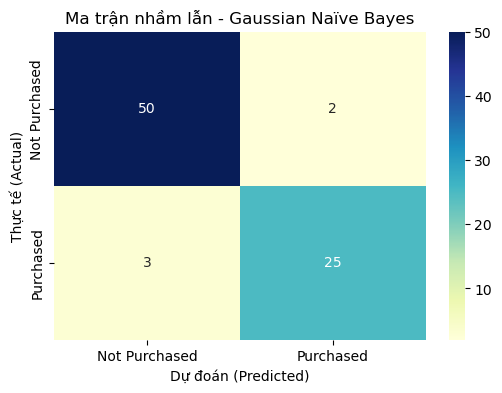

In [9]:
if 'data' in locals():
    print("\n--- 5. Đánh giá hiệu quả mô hình ---")
    # Make predictions on the test data (đã chuẩn hóa)
    y_pred = classifier.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}") # In 4 số lẻ cho rõ
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    
    # Vẽ ma trận nhầm lẫn cho đẹp hơn (Giống bài SVM)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", 
                xticklabels=['Not Purchased', 'Purchased'], 
                yticklabels=['Not Purchased', 'Purchased'])
    plt.title('Ma trận nhầm lẫn - Gaussian Naïve Bayes')
    plt.xlabel('Dự đoán (Predicted)')
    plt.ylabel('Thực tế (Actual)')
    plt.show()

In [10]:
!jupyter nbconvert --to html "2.3.3 Bài tập thực hành 1.ipynb"

[NbConvertApp] Converting notebook 2.3.3 Bài tập thực hành 1.ipynb to html
[NbConvertApp] Writing 282805 bytes to 2.3.3 Bài tập thực hành 1.html
